In [4]:
import pandas as pd
import numpy as np
from sklearn import datasets

from basic_Perceptron import Perceptron
from basic_Adaline import AdalineGD
from adalineSGD import AdalineSGD

from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
%matplotlib inline


In [2]:
# loading the Iris data directly from UCI ML Repository
df=pd.read_csv('https://archive.ics.uci.edu/ml/' 'machine-learning-databases/iris/iris.data',header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [3]:
# we'll extract sepal length and the petal length as the feature with first 100 features
# 50 for setosa(-1) and 50 for versicolor(1).

# select setosa and versicolor and labelling them as -1 and 1 respectively.
y=df.iloc[0:100,4].values
y=np.where(y=='Iris-setosa',-1,1)
print(y)

# Extracting Sepal_length(0) and Petal_length(3) as features in X
X=df.iloc[:100,[0,3]].values
X.shape

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1]


(100, 2)

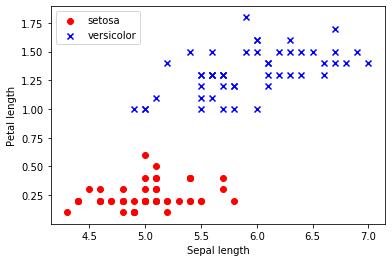

In [31]:
# We'll visualise the data via 2-D scatter plot
plt.scatter(X[:50,0],X[:50,1],
           color='red',marker='o',label='setosa')
plt.scatter(X[50:,0],X[50:,1],
           color='blue',marker='x',label='versicolor')
plt.xlabel('Sepal length')
plt.ylabel('Petal length')
plt.legend(loc='upper left')
plt.show()

Thus, we can see that a linear boundry would be sufficient to seperate the two classes(i.e. Setosa and Veriscolor) based on the two features.

# Implementing Perceptron

In [34]:
# Time has come to put forward the Perceptron algorithm to test.
ppn=Perceptron(eta=0.1,n_iter=10)
ppn.fit(X,y)

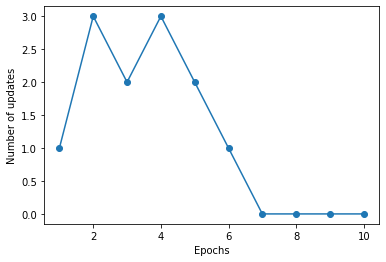

In [37]:
# Plotting the errors caused by our model for each epoch.
plt.plot(range(1,len(ppn.error_)+1),ppn.error_,
        marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

Hence, we can see that the perceptron converged at seventh epoch and should be able to classify the training sample perfectly. Let's plot the small function to visualise the decision boundries for 2-D datasets.

In [15]:
x1_min,x1_max=X[:,0].min()-1,X[:,0].max()+1
x2_min,x2_max=X[:,1].min()-1,X[:,1].max()+1
xx1,xx2=np.meshgrid(np.arange(x1_min,x1_max,0.02),
                       np.arange(x2_min,x2_max,0.02))
len(np.array([xx1.ravel(),xx2.ravel()]).T)

61600

In [17]:
X_std.shape

(150, 2)

In [71]:
xx2.shape

(185, 235)

In [74]:
for idx,cl in enumerate(np.unique(y)):
    print(X[y==cl,0])

[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
 5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
 5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5. ]
[7.  6.4 6.9 5.5 6.5 5.7 6.3 4.9 6.6 5.2 5.  5.9 6.  6.1 5.6 6.7 5.6 5.8
 6.2 5.6 5.9 6.1 6.3 6.1 6.4 6.6 6.8 6.7 6.  5.7 5.5 5.5 5.8 6.  5.4 6.
 6.7 6.3 5.6 5.5 5.5 6.1 5.8 5.  5.6 5.7 5.7 6.2 5.1 5.7]


In [82]:
for idx,cl in enumerate(np.unique(y)):
    print(X[y==cl,1])

[0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 0.2 0.2 0.1 0.1 0.2 0.4 0.4 0.3
 0.3 0.3 0.2 0.4 0.2 0.5 0.2 0.2 0.4 0.2 0.2 0.2 0.2 0.4 0.1 0.2 0.1 0.2
 0.2 0.1 0.2 0.2 0.3 0.3 0.2 0.6 0.4 0.3 0.2 0.2 0.2 0.2]
[1.4 1.5 1.5 1.3 1.5 1.3 1.6 1.  1.3 1.4 1.  1.5 1.  1.4 1.3 1.4 1.5 1.
 1.5 1.1 1.8 1.3 1.5 1.2 1.3 1.4 1.4 1.7 1.5 1.  1.1 1.  1.2 1.6 1.5 1.6
 1.5 1.3 1.3 1.3 1.2 1.4 1.2 1.  1.3 1.2 1.3 1.3 1.1 1.3]


In [28]:
def plot_decision_regions(X,y,classifier,resolution=0.02):
    markers=['s','x','o','^','v']
    colors=('red','blue','lightgreen','gray','cyan')
    # get different colors for different classes present in 'y'.
    cmap=ListedColormap(colors[:len(np.unique(y))])
    
    # Plot the decision surface.
    x1_min,x1_max=X[:,0].min()-1,X[:,0].max()+1
    x2_min,x2_max=X[:,1].min()-1,X[:,1].max()+1
    
    # We use the min and the max values of above 2 features create a pair of grid arrays 
    # xx1 and xx2 via np.meshgrid()
    xx1,xx2=np.meshgrid(np.arange(x1_min,x1_max,resolution),
                       np.arange(x2_min,x2_max,resolution))
    
    # Since we have trained our model of 2 featuers we need to flatten the grid arrays and
    # create a matrix that has the same number of columns as the Iris training dataset so that we can
    # use the `predict` method.
    Z=classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z=Z.reshape(xx1.shape)
    
    # Plotting the contour along with the predicted values
    plt.contourf(xx1,xx2,Z,alpha=0.3,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    # Plot the class samples
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0],           # Acts as a boolean mask and select the features as per the index where
                    y=X[y==cl,1],           # values comes out to be true
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

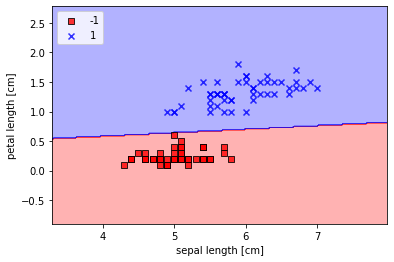

In [93]:
# Calling the above function to generate the decision boundry
plot_decision_regions(X,y,classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

# Implementing AdalineGD

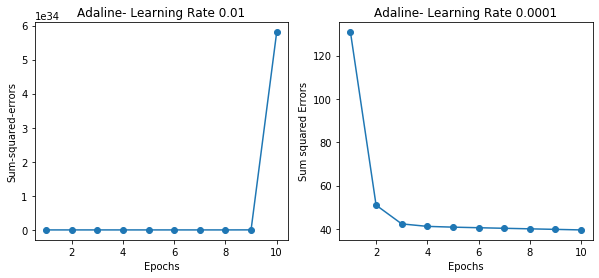

In [8]:
# X,y are from the same Iris datasets
# To have the optimum value for the learning rate we need to perform few computations 
# so as to select the best value for 'eta'. We'll try 2 values 0.1 and 0.0001

fig,ax=plt.subplots(1,2,figsize=(10,4))

ad1=AdalineGD(n_iter=10,eta=0.01)
ad1.fit(X,y)
ax[0].plot(range(1,len(ad1.cost_)+1),ad1.cost_,
          marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Sum-squared-errors')
ax[0].set_title('Adaline- Learning Rate 0.01')

ad2=AdalineGD(n_iter=10,eta=0.0001).fit(X,y)
ax[1].plot(range(1,len(ad2.cost_)+1),ad2.cost_,
          marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum squared Errors')
ax[1].set_title('Adaline- Learning Rate 0.0001')
plt.show()

Thus, we can see clearly that value of eta=0.01 overshoots and misses the local/global minima, whereas <br>
for eta=0.0001 the cost function value minimises with the evaluation. Hence, when the value of learning<br> 
rate is too high it overshoots the local minima and when the value of learning rate is too small it takes<br>
large number of steps to reach the local/global minima.

### Standardization 
It gives the property of a standard normal distribution, with the mean of the data centered at 0 and all the points are 1 std away. This helps in converging the cost function quickly as it minimises the scale.

In [5]:
X_std=np.copy(X)
X_std[:,0]=(X[:,0]-X[:,0].mean())/X[:,0].std()
X_std[:,1]=(X[:,1]-X[:,1].mean())/X[:,1].std()

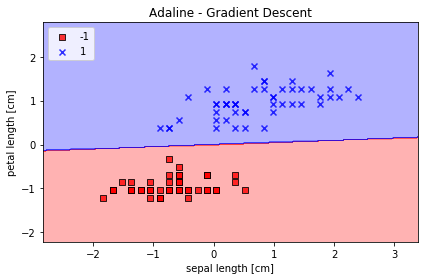

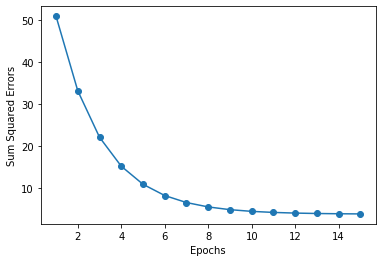

In [22]:
# We'll again train our Adaline model with eta=0.01
ada=AdalineGD(n_iter=15,eta=0.01).fit(X_std,y)

# Plotting the decision Boundry
plot_decision_regions(X_std,y,classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

#Plotting the error curve
plt.plot(range(1,len(ada.cost_)+1),ada.cost_,
        marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum Squared Errors')
plt.show()

Hence, this time our model converges even for the value of eta=0.01 as the value of feature matrix is normalised.
Also, we can see that even if we classify all the points correctly the value of SSE still remains non-zero.

# Implementing AdalineSGD

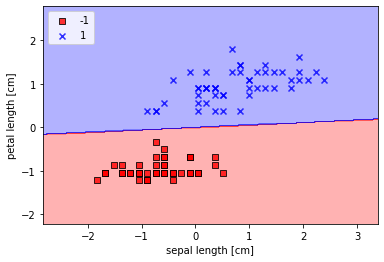

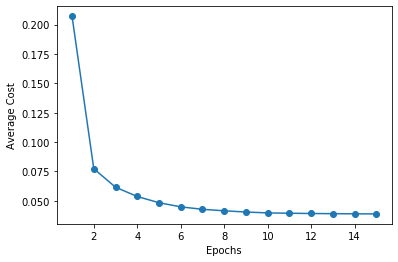

In [6]:
ada_sgd=AdalineSGD(n_iter=15)
ada_sgd.fit(X_std,y)

plot_decision_regions(X_std,y,classifier=ada_sgd)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

# Plotting Cost vs Epochs
plt.plot(range(1,len(ada_sgd.cost_)+1),ada_sgd.cost_,
        marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.show()

Thus, we can see that the average cost goes down quickly without the need to go through the complete training data again and again.

# Implementing Perceptron via Sklearn package

In [13]:
# Load the iris dataset
iris=datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [14]:
# Split the data into feature matrix and target values.
X_iris=iris.data
y_iris=iris.target

In [16]:
# Let's perform PCA for reducing the feature space to 2 features
reduce=PCA(n_components=2).fit(X_iris)
X_iris=reduce.transform(x_iris)
X_iris

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [19]:
# Now we'll be using these two features alone  in place of all the 4 features.
# Let's check the class distribution
print(np.bincount(y_iris))
print(np.unique(y_iris))

[50 50 50]
[0 1 2]


In [21]:
# Now to check how well our model performs on unseen data let's split the data into 
# training and testing with 70% data in training and 30% in testing.

x_train,x_test,y_train,y_test=train_test_split(X_iris,y_iris,test_size=0.3,random_state=1,stratify=y_iris)
x_train.shape,x_test.shape

((105, 2), (45, 2))

In [24]:
# 'stratify' makes sure that the proportion of class distribution is the same in training and testing 
print(np.bincount(y_train))
np.bincount(y_test)

[35 35 35]


array([15, 15, 15])

In [25]:
# Let's normalise the data onto common scale by using StandardScaler for standardization.
scaler=StandardScaler().fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [26]:
# Now, we'll create the object of the perceptron from sklearn package
# and fit the model to evaluate later. This like others uses OVA/OVR
# for multiclass Classification
ppn=Perceptron(max_iter=40,alpha=0.1,random_state=1)
ppn.fit(x_train,y_train)

Perceptron(alpha=0.1, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=40, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=1, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [27]:
# Let's calculate the accuracy of this model 
print("Accuracy :{}".format(ppn.score(x_test,y_test)))

Accuracy :0.8444444444444444


Thus, we can see that our model performs well with an accuracy of 84.4% using 2 features derived from 4 features

In [29]:
# Let's combine the dataset to combine all the training and the testing values together for plotting
x_total=np.vstack((x_train,x_test))
y_total=np.hstack((y_train,y_test))
x_total.shape,y_total.shape

((150, 2), (150,))

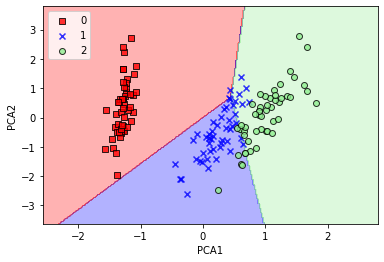

In [31]:
# Now using the f'n above let's plot the decision boundary
plot_decision_regions(x_total,y_total,classifier=ppn)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(loc='upper left')
plt.show()

Hence, we can see from above that perceptron does a really good job for classification. But, if the data is not linearly seperable then the algorithm never converges to any point(as the weights keep on updating). Hence, it's better to use some other more efficient algorithm that can converge at a point like for e.g. `LogisticRegression`.